In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_excel('House_Rent_Train.xlsx')
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Data Processing
df.shape

(20555, 25)

In [4]:
df.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,20532.0,12.945748,0.029601,12.900004,12.918176,12.943790,12.970979,12.999999
longitude,20532.0,77.637295,0.110525,77.500072,77.572068,77.633506,77.695723,80.266346
gym,20555.0,0.227049,0.418935,0.000000,0.000000,0.000000,0.000000,1.000000
lift,20555.0,0.362053,0.480606,0.000000,0.000000,0.000000,1.000000,1.000000
swimming_pool,20555.0,0.174848,0.379846,0.000000,0.000000,0.000000,0.000000,1.000000
negotiable,20555.0,0.711603,0.453028,0.000000,0.000000,1.000000,1.000000,1.000000
property_size,20555.0,1062.017465,591.207446,1.000000,700.000000,1047.000000,1285.000000,50000.000000
property_age,20532.0,5.769920,6.350989,-1.000000,1.000000,5.000000,10.000000,400.000000
bathroom,20532.0,1.858465,0.710926,1.000000,1.000000,2.000000,2.000000,21.000000
cup_board,20532.0,4.549922,335.154787,0.000000,1.000000,2.000000,3.000000,48026.000000


In [7]:
# Null values
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [8]:
# Removing null values
df = df.dropna()
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [9]:
df['amenities']

1        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
2        {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
3        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
4        {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
5        {"LIFT":true,"GYM":true,"INTERNET":false,"AC":...
                               ...                        
20524    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
20528    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
20529    {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
20530    {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...
20531    {"LIFT":false,"GYM":false,"INTERNET":false,"AC...
Name: amenities, Length: 20377, dtype: object

In [10]:
# convert string dictionary into dictionary

def amenities_encoding(amenities):

    # load the string dictionary to json [convert true=True and false=False - boolean format]
    a = json.loads(amenities)

    # value = True means convert to 1, else convert to 0 ----> [so True convert to 1 and False convert to 0]
    b = {key:1 if value else 0 for key,value in a.items()}

    # remove the existing column in df
    for i in ['LIFT','GYM','POOL']:
        b.pop(i, None)

    return b

In [11]:
df['amenities'] = df['amenities'].apply(lambda x: amenities_encoding(x))
df.head()

C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\953719926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amenities'] = df['amenities'].apply(lambda x: amenities_encoding(x))


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",CORPORATION,IH,1.0,45000.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,...,2.0,E,1.0,3.0,5.0,"{'INTERNET': 0, 'AC': 0, 'CLUB': 1, 'INTERCOM'...",CORP_BORE,AP,2.0,18000.0


In [12]:
# make new dataframe for amenities dictionary
amenities_df = pd.DataFrame(df['amenities'].tolist(), index=df.index)

# column names convert to lower case
amenities_df.columns = amenities_df.columns.str.lower()
amenities_df.head()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
1,0,0,0.0,0,0.0,0,0.0,1,1,0.0,1,1.0,1.0,0,1,1.0
2,0,0,0.0,0,1.0,0,0.0,0,1,0.0,1,0.0,0.0,0,1,1.0
3,0,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4,0,0,0.0,0,1.0,0,0.0,0,0,0.0,1,0.0,0.0,0,0,1.0
5,0,0,1.0,0,1.0,1,0.0,1,0,0.0,0,0.0,0.0,0,1,0.0


In [13]:
# concatinate amenities dataframe with df
df = pd.concat([df, amenities_df], axis=1)
df.drop(columns='amenities', inplace=True)
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,0.0,1,1,0.0,1,1.0,1.0,0,1,1.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,0.0,0,1,0.0,1,0.0,0.0,0,1,1.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0,1.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,...,0.0,1,0,0.0,0,0.0,0.0,0,1,0.0


In [14]:
df.isnull().sum()

id                    0
type                  0
locality              0
activation_date       0
latitude              0
longitude             0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
rent                  0
internet              0
ac                    0
club               1055
intercom              0
cpa                1055
fs                    0
servant            1055
security              0
sc                    0
gp                 1055
park                  0
rwh                1055
stp                1055
hk                    0
pb                    0
vp                 1055
dtype: int64

In [15]:
df.fillna(0, inplace=True)
df.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20524,ff80818159ded60e0159dfff948e5bcb,BHK1,Ulsoor,2017-11-10 17:08:00,12.979762,77.615395,ANYONE,0,1,0,...,0.0,1,1,1.0,1,0.0,0.0,1,0,1.0
20528,ff8081815e73c2e2015e74ac10e91975,BHK2,Koramangala 4th Block,19-10-2017 20:31,12.931072,77.632361,ANYONE,0,0,0,...,0.0,0,1,0.0,1,1.0,0.0,0,0,0.0
20529,ff8081816073f28c016077bb8db47e4f,BHK2,Kumaraswamy Layout,21-12-2017 21:18,12.901800,77.566597,FAMILY,1,1,0,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,28-06-2018 21:58,12.965502,77.647694,FAMILY,0,1,0,...,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20531,ff80818156fdef920156fe0eb0e807d0,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,...,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [16]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
rent               0
internet           0
ac                 0
club               0
intercom           0
cpa                0
fs                 0
servant            0
security           0
sc                 0
gp                 0
park               0
rwh                0
stp                0
hk                 0
pb                 0
vp                 0
dtype: int64

In [17]:
df_1 = df
df_1.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,0.0,1,1,0.0,1,1.0,1.0,0,1,1.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,0.0,0,1,0.0,1,0.0,0.0,0,1,1.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,0.0,0,0,0.0,1,0.0,0.0,0,0,1.0
5,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",24-10-2017 18:29,12.986196,77.718314,FAMILY,1,1,1,...,0.0,1,0,0.0,0,0.0,0.0,0,1,0.0


In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 1 to 20531
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20377 non-null  object 
 1   type             20377 non-null  object 
 2   locality         20377 non-null  object 
 3   activation_date  20377 non-null  object 
 4   latitude         20377 non-null  float64
 5   longitude        20377 non-null  float64
 6   lease_type       20377 non-null  object 
 7   gym              20377 non-null  int64  
 8   lift             20377 non-null  int64  
 9   swimming_pool    20377 non-null  int64  
 10  negotiable       20377 non-null  int64  
 11  furnishing       20377 non-null  object 
 12  parking          20377 non-null  object 
 13  property_size    20377 non-null  int64  
 14  property_age     20377 non-null  float64
 15  bathroom         20377 non-null  float64
 16  facing           20377 non-null  object 
 17  cup_board        

In [19]:
df_1['activation_date'] = pd.to_datetime(df_1['activation_date'])
df_1.tail(2)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
20530,ff8081814c6f8c9b014c6febae49016f,BHK2,Indiranagar,2018-06-28 21:58:00,12.965502,77.647694,FAMILY,0,1,0,...,0.0,1,1,0.0,1,0.0,0.0,1,1,1.0
20531,ff80818156fdef920156fe0eb0e807d0,BHK1,Malleshwaram West,2018-08-07 22:31:00,12.998645,77.574336,ANYONE,0,0,0,...,0.0,0,1,0.0,1,0.0,0.0,0,0,0.0


In [20]:
df_1['activation_day'] =df_1['activation_date'].dt.day
df_1['activation_month'] = df_1['activation_date'].dt.month
df_1['activation_year'] = df_1['activation_date'].dt.year
df_1.drop(columns='activation_date', inplace=True)
df_1.head(3)

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,...,0.0,1,1.0,1.0,0,1,1.0,10,9,2017
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,...,0.0,1,0.0,0.0,0,1,1.0,6,12,2018
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,...,0.0,0,0.0,0.0,0,0,0.0,20,7,2018


In [21]:
df_1['no_of_amenities'] = df_1['gym'] + df_1['lift'] + df_1['swimming_pool'] + df_1['internet'] +df_1['ac'] + df_1['club'] + df_1['intercom'] + df_1['cpa'] + df_1['fs'] + df_1['servant'] + df_1['security'] + df_1['sc'] + df_1['gp'] + df_1['park'] +df_1['rwh'] + df_1['stp'] + df_1['hk'] + df_1['pb'] + df_1['vp']
df_1.head(3)

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,...,1,1.0,1.0,0,1,1.0,10,9,2017,8.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,...,1,0.0,0.0,0,1,1.0,6,12,2018,6.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,...,0,0.0,0.0,0,0,0.0,20,7,2018,0.0


In [22]:
df_1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
count,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,...,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000,20377.000000
mean,12.945750,77.637238,0.226235,0.361142,0.174461,0.711488,1061.437209,5.777053,1.857732,4.567503,...,0.506012,0.246503,0.170535,0.198557,0.364921,0.238553,15.344555,6.325072,2017.637336,5.177700
std,0.029587,0.110758,0.418404,0.480344,0.379515,0.453081,591.857798,6.362450,0.710933,336.427053,...,0.499976,0.430986,0.376112,0.398924,0.481420,0.426209,8.864386,3.251640,0.480781,4.570412
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,12.918232,77.571912,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2017.000000,2.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1044.000000,5.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,6.000000,2018.000000,3.000000
75%,12.970922,77.695692,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,9.000000,2018.000000,8.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2018.000000,19.000000


In [23]:
df_1= df_1[['activation_day', 'activation_month', 'activation_year', 'locality', 'latitude', 'longitude', 'type', 'lease_type',
           'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor', 'building_type', 'water_supply',
           'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac',
           'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities', 'rent']]

df_1.head()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
1,10,9,2017,Bellandur,12.929557,77.672280,BHK2,ANYONE,1400,4.0,...,1,0.0,1,1.0,1.0,0,1,1.0,8.0,22000.0
2,6,12,2018,Thiruvanmiyur,12.982870,80.262012,BHK3,FAMILY,1350,6.0,...,1,0.0,1,0.0,0.0,0,1,1.0,6.0,28000.0
3,20,7,2018,Attiguppe,12.955991,77.531634,BHK1,FAMILY,600,3.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,8000.0
4,31,5,2018,Kodihalli,12.963903,77.649446,BHK3,FAMILY,1500,15.0,...,0,0.0,1,0.0,0.0,0,0,1.0,3.0,45000.0
5,24,10,2017,"Seetharampalya,Hoodi",12.986196,77.718314,BHK1,FAMILY,1080,0.0,...,0,0.0,0,0.0,0.0,0,1,0.0,8.0,18000.0


In [24]:
df_1.nunique()

activation_day         31
activation_month       12
activation_year         2
locality             1917
latitude            17625
longitude           17617
type                    9
lease_type              4
property_size        1136
property_age           44
furnishing              3
facing                  8
floor                  23
total_floor            27
building_type           4
water_supply            3
negotiable              2
cup_board              19
balconies               9
parking                 4
bathroom                8
gym                     2
lift                    2
swimming_pool           2
internet                2
ac                      2
club                    2
intercom                2
cpa                     2
fs                      2
servant                 2
security                2
sc                      2
gp                      2
park                    2
rwh                     2
stp                     2
hk                      2
pb          

In [25]:
print("Unique values of type \n")
print(df_1['type'].unique())

Unique values of type 

['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS' '1BHK1' 'bhk2' 'bhk3']


In [26]:
df_1['type'] = df_1['type'].str.upper()  # Convert all values to uppercase for consistency
df_1['type'] = df_1['type'].str.replace('1BHK1', 'BHK1')  # Correct '1BHK1' to 'BHK1'
df_1['type'] = df_1['type'].str.replace('BHK', 'BHK')  # Correct variations of 'bhk' to 'BHK'

# Display unique values after correction
print(df_1['type'].unique())

['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS']


C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\3407892098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['type'] = df_1['type'].str.upper()  # Convert all values to uppercase for consistency
C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\3407892098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['type'] = df_1['type'].str.replace('1BHK1', 'BHK1')  # Correct '1BHK1' to 'BHK1'
C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\3407892098.py:3: SettingWithCopyWarning: 
A value is trying to

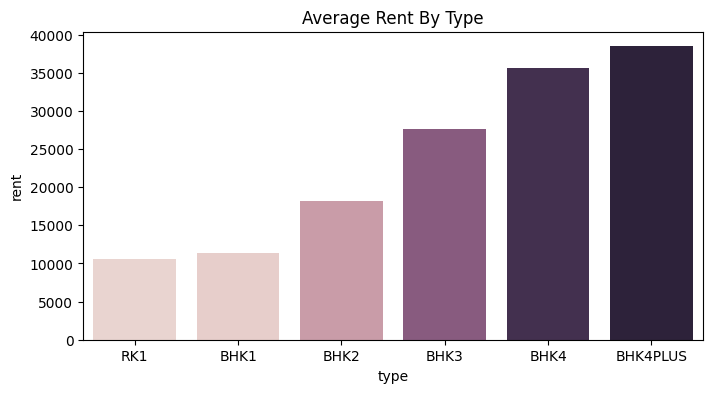

In [27]:
type = df_1.groupby("type")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = type.index, y = type, hue = type, legend = False)
plt.title('Average Rent By Type')
plt.show()

In [28]:
print("Unique values of lease_type \n")
print(df_1['lease_type'].unique())

Unique values of lease_type 

['ANYONE' 'FAMILY' 'BACHELOR' 'COMPANY']


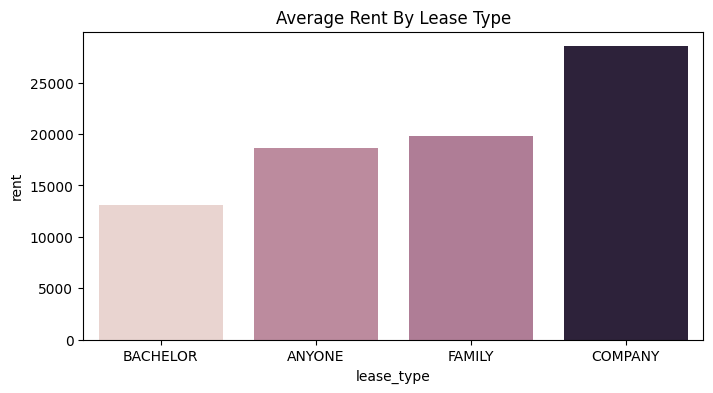

In [29]:
lease_type = df_1.groupby("lease_type")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = lease_type.index, y = lease_type, hue = lease_type, legend = False)
plt.title('Average Rent By Lease Type')
plt.show()

In [30]:
print("Unique values of furnishing \n")
print(df_1['furnishing'].unique())

Unique values of furnishing 

['SEMI_FURNISHED' 'FULLY_FURNISHED' 'NOT_FURNISHED']


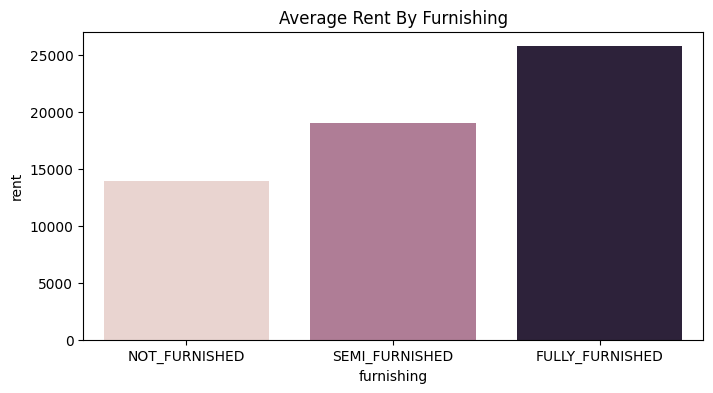

In [31]:
furnishing = df_1.groupby("furnishing")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = furnishing.index, y = furnishing, hue = furnishing, legend = False)
plt.title('Average Rent By Furnishing')
plt.show()

In [32]:
print("Unique values of parking \n")
print(df_1['parking'].unique())

Unique values of parking 

['BOTH' 'TWO_WHEELER' 'NONE' 'FOUR_WHEELER']


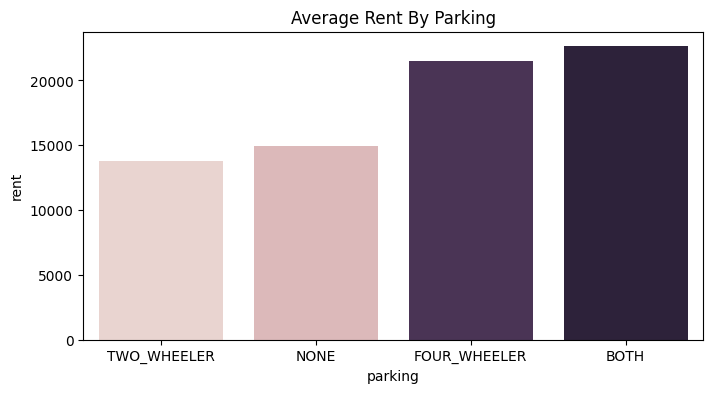

In [33]:
parking = df_1.groupby("parking")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = parking.index, y = parking, hue = parking, legend = False)
plt.title('Average Rent By Parking')
plt.show()

In [34]:
print("Unique values of facing \n")
print(df_1['facing'].unique())

Unique values of facing 

['NE' 'E' 'S' 'N' 'SE' 'W' 'NW' 'SW']


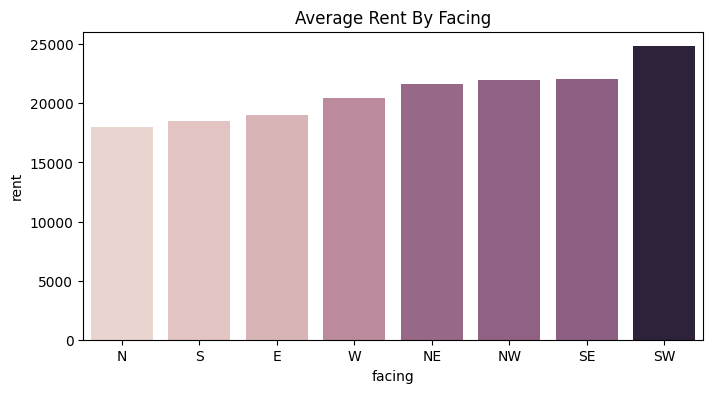

In [35]:
facing = df_1.groupby("facing")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = facing.index, y = facing, hue = facing, legend = False)
plt.title('Average Rent By Facing')
plt.show()

In [36]:
print("Unique values of water_supply \n")
print(df_1['water_supply'].unique())

Unique values of water_supply 

['CORPORATION' 'CORP_BORE' 'BOREWELL']


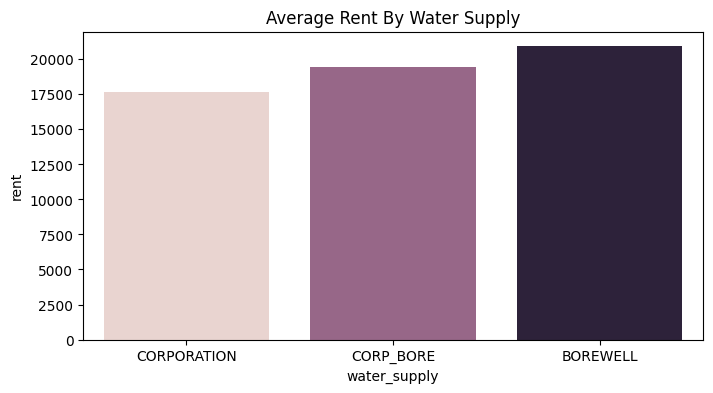

In [37]:
water_supply = df_1.groupby("water_supply")["rent"].mean().sort_values(ascending = True)

plt.figure(figsize = (8,4))
sns.barplot(x = water_supply.index, y = water_supply, hue = water_supply, legend = False)
plt.title('Average Rent By Water Supply')
plt.show()


In [38]:
print("Unique values of building_type  \n")
print(df_1['building_type'].unique())

Unique values of building_type  

['AP' 'IH' 'IF' 'GC']


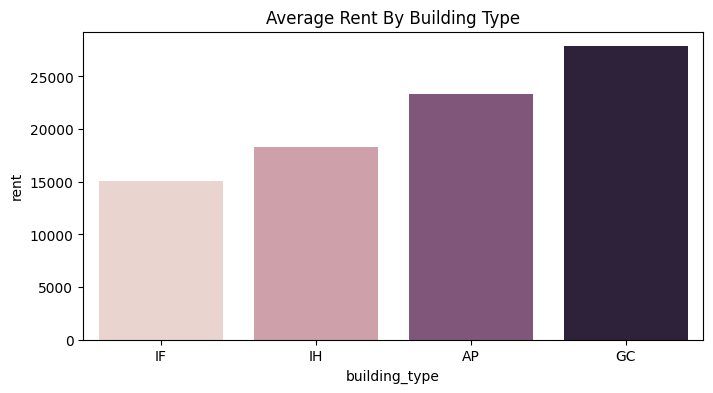

In [39]:
building_type = df_1.groupby("building_type")["rent"].mean().sort_values(ascending = True) 

plt.figure(figsize = (8,4))
sns.barplot(x = building_type.index, y = building_type, hue = building_type, legend = False)
plt.title('Average Rent By Building Type')
plt.show()

In [40]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 1 to 20531
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activation_day    20377 non-null  int32  
 1   activation_month  20377 non-null  int32  
 2   activation_year   20377 non-null  int32  
 3   locality          20377 non-null  object 
 4   latitude          20377 non-null  float64
 5   longitude         20377 non-null  float64
 6   type              20377 non-null  object 
 7   lease_type        20377 non-null  object 
 8   property_size     20377 non-null  int64  
 9   property_age      20377 non-null  float64
 10  furnishing        20377 non-null  object 
 11  facing            20377 non-null  object 
 12  floor             20377 non-null  float64
 13  total_floor       20377 non-null  float64
 14  building_type     20377 non-null  object 
 15  water_supply      20377 non-null  object 
 16  negotiable        20377 non-null  int64  
 17

In [41]:
# encoding the categorical features into numerical features

df_1['type'] = df_1['type'].map({'RK1':0, 'BHK1':1, 'BHK2':2, 'BHK3':3, 'BHK4':4, 'BHK4PLUS':5})
df_1['facing'] = df_1['facing'].map({'N':1, 'E':2, 'W':3, 'S':4, 'NE':5, 'NW':6, 'SE':7, 'SW':8})
df_1['lease_type'] = df_1['lease_type'].map({'BACHELOR':1, 'FAMILY':2, 'COMPANY':3, 'ANYONE':4})
df_1['furnishing'] = df_1['furnishing'].map({'NOT_FURNISHED':0, 'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2})
df_1['parking'] = df_1['parking'].map({'NONE':0, 'TWO_WHEELER':1, 'FOUR_WHEELER':2, 'BOTH':3})
df_1['water_supply'] = df_1['water_supply'].map({'CORPORATION':1, 'CORP_BORE':2, 'BOREWELL':3,})
df_1['building_type'] = df_1['building_type'].map({'AP':1, 'IH':2, 'IF':3, 'GC':4})


C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\2622297042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['type'] = df_1['type'].map({'RK1':0, 'BHK1':1, 'BHK2':2, 'BHK3':3, 'BHK4':4, 'BHK4PLUS':5})
C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\2622297042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['facing'] = df_1['facing'].map({'N':1, 'E':2, 'W':3, 'S':4, 'NE':5, 'NW':6, 'SE':7, 'SW':8})
C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\2622297042.py:5: SettingWithCopyWarning: 
A 

In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 1 to 20531
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activation_day    20377 non-null  int32  
 1   activation_month  20377 non-null  int32  
 2   activation_year   20377 non-null  int32  
 3   locality          20377 non-null  object 
 4   latitude          20377 non-null  float64
 5   longitude         20377 non-null  float64
 6   type              20377 non-null  int64  
 7   lease_type        20377 non-null  int64  
 8   property_size     20377 non-null  int64  
 9   property_age      20377 non-null  float64
 10  furnishing        20377 non-null  int64  
 11  facing            20377 non-null  int64  
 12  floor             20377 non-null  float64
 13  total_floor       20377 non-null  float64
 14  building_type     20377 non-null  int64  
 15  water_supply      20377 non-null  int64  
 16  negotiable        20377 non-null  int64  
 17

In [43]:
df_1.head()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities,rent
1,10,9,2017,Bellandur,12.929557,77.672280,2,4,1400,4.0,...,1,0.0,1,1.0,1.0,0,1,1.0,8.0,22000.0
2,6,12,2018,Thiruvanmiyur,12.982870,80.262012,3,2,1350,6.0,...,1,0.0,1,0.0,0.0,0,1,1.0,6.0,28000.0
3,20,7,2018,Attiguppe,12.955991,77.531634,1,2,600,3.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,8000.0
4,31,5,2018,Kodihalli,12.963903,77.649446,3,2,1500,15.0,...,0,0.0,1,0.0,0.0,0,0,1.0,3.0,45000.0
5,24,10,2017,"Seetharampalya,Hoodi",12.986196,77.718314,1,2,1080,0.0,...,0,0.0,0,0.0,0.0,0,1,0.0,8.0,18000.0


EDA

1. Correlation Analysis

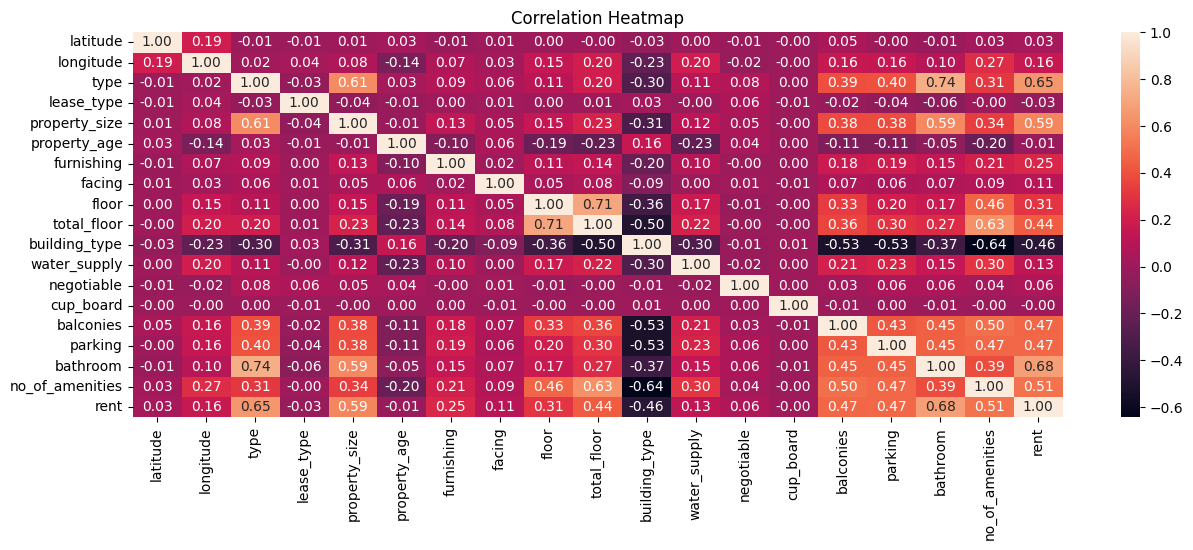

In [44]:
# Calculate the correlation matrix
df1_corr = df_1[['latitude', 'longitude', 'type', 'lease_type', 'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor',
                'building_type', 'water_supply', 'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'no_of_amenities', 'rent']].corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df1_corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

3.Temporal Analysis

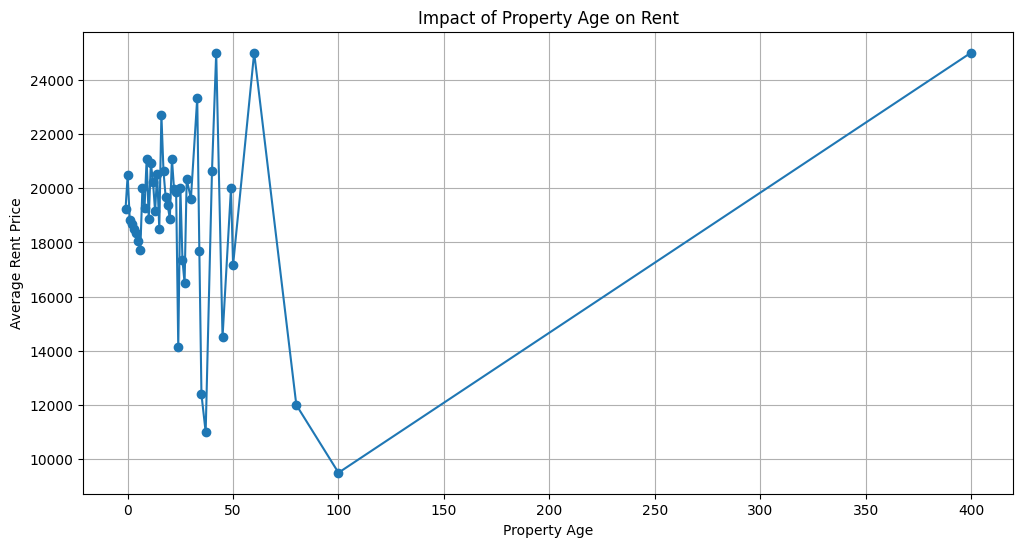

In [45]:
# Impact of property age on rent over time
property_age_rent_trend = df_1.groupby('property_age')['rent'].mean()

# Plotting property age vs. average rent
plt.figure(figsize=(12, 6))
property_age_rent_trend.plot(marker='o')
plt.title('Impact of Property Age on Rent')
plt.xlabel('Property Age')
plt.ylabel('Average Rent Price')
plt.grid(True)
plt.show()

5. Building Characteristics

C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\681874561.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  floor_category_rent_trend = df2.groupby('floor_category')['rent'].mean()


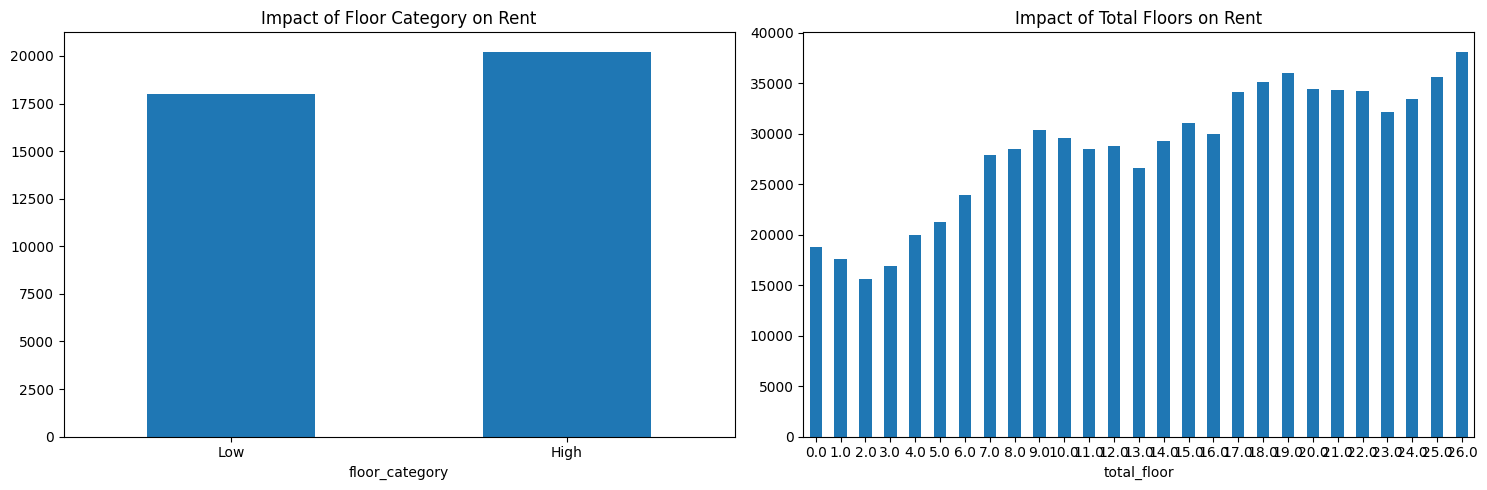

In [46]:
# Create a new column 'floor_category' to categorize buildings as 'High' or 'Low'
df2=df_1
df2['floor_category'] = pd.cut(df_1['floor'], bins=[-float('inf'), df_1['floor'].median(), float('inf')], labels=['Low', 'High'])

# Impact of floor category on rent
floor_category_rent_trend = df2.groupby('floor_category')['rent'].mean()

# Impact of total floors on rent
total_floor_rent_trend = df2.groupby('total_floor')['rent'].mean()

# Plotting the trends
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

floor_category_rent_trend.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Impact of Floor Category on Rent')

total_floor_rent_trend.plot(kind='bar', ax=axes[1], rot=0)
axes[1].set_title('Impact of Total Floors on Rent')

plt.tight_layout()
plt.show()

In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 1 to 20531
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   activation_day    20377 non-null  int32   
 1   activation_month  20377 non-null  int32   
 2   activation_year   20377 non-null  int32   
 3   locality          20377 non-null  object  
 4   latitude          20377 non-null  float64 
 5   longitude         20377 non-null  float64 
 6   type              20377 non-null  int64   
 7   lease_type        20377 non-null  int64   
 8   property_size     20377 non-null  int64   
 9   property_age      20377 non-null  float64 
 10  furnishing        20377 non-null  int64   
 11  facing            20377 non-null  int64   
 12  floor             20377 non-null  float64 
 13  total_floor       20377 non-null  float64 
 14  building_type     20377 non-null  int64   
 15  water_supply      20377 non-null  int64   
 16  negotiable        20377 non

In [48]:
x = df_1.drop(columns=['locality', 'rent','floor_category'], axis=1)
y = df_1['rent']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined

reg = LinearRegression().fit(x_train, y_train)

y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))

MSE - Train: 24857838.6977 Test: 26017670.2548
R2 - Train: 0.6511 Test: 0.6317
MAE - Train: 3639.7476 Test: 3705.7120


In [50]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Compute the MSE, MAE, and R2 for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Compute the MSE, MAE, and R2 for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))

MSE - Train: 0.0000 Test: 28621054.2579
R2 - Train: 1.0000 Test: 0.5948
MAE - Train: 0.0000 Test: 3784.4659


In [51]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Compute the MSE, MAE, and R2 for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Compute the MSE, MAE, and R2 for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))

MSE - Train: 1924421.9594 Test: 14528064.1416
MAE - Train: 969.3247 Test: 2655.4995
R2 - Train: 0.9730 Test: 0.7943


In [52]:
#XGBOOST
import xgboost as xgb
# Create an XGBoost Regressor with 'reg:linear' objective
XGB = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, seed=42)

# Fit the model to the training data
XGB.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = XGB.predict(x_train)
y_pred_test = XGB.predict(x_test)

# Compute the MSE, MAE, and R2 for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Compute the MSE, MAE, and R2 for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))

MSE - Train: 550627.8165 Test: 14601543.5979
MAE - Train: 523.7723 Test: 2651.5999
R2 - Train: 0.9923 Test: 0.7933


In [53]:
df_test = pd.read_excel("House_Rent_Test.xlsx")

In [54]:
df_test.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [55]:
#checking for null values
df_test.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [56]:
df_test['amenities']

0       {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...
1       {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
2       {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
3       {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
4       {"LIFT":true,"GYM":true,"INTERNET":true,"AC":f...
                              ...                        
4495    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
4496    {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...
4497    {"SC":false,"INTERCOM":false,"AC":false,"PB":f...
4498    {"SC":false,"INTERCOM":true,"AC":false,"PB":tr...
4499    {"LIFT":true,"GYM":true,"INTERNET":false,"AC":...
Name: amenities, Length: 4500, dtype: object

In [57]:
# convert string dictionary into dictionary

def amenities_encoding(amenities):

    # load the string dictionary to json [convert true=True and false=False - boolean format]
    a = json.loads(amenities)

    # value = True means convert to 1, else convert to 0 ----> [so True convert to 1 and False convert to 0]
    b = {key:1 if value else 0 for key,value in a.items()}

    # remove the existing column in df
    for i in ['LIFT','GYM','POOL']:
        b.pop(i, None)

    return b

In [58]:

df_test['amenities'] = df_test['amenities'].apply(lambda x: amenities_encoding(x))
df_test.tail(3)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,10,1,W,1,2,3,"{'SC': 0, 'INTERCOM': 0, 'AC': 0, 'PB': 0, 'HK...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,1,3,N,4,10,10,"{'SC': 0, 'INTERCOM': 1, 'AC': 0, 'PB': 1, 'HK...",BOREWELL,AP,3
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,27-03-2018 16:25,12.915296,77.676694,FAMILY,1,1,1,...,10,3,E,7,5,8,"{'INTERNET': 0, 'AC': 0, 'CLUB': 0, 'INTERCOM'...",BOREWELL,AP,3


In [59]:
# make new dataframe for amenities dictionary
amenities_df = pd.DataFrame(df_test['amenities'].tolist(), index=df_test.index)

# column names convert to lower case
amenities_df.columns = amenities_df.columns.str.lower()
amenities_df.tail()

,internet,ac,club,intercom,cpa,fs,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
4495,1,0,0.0,0,0.0,0,0.0,1,1,0.0,0,0.0,0.0,0,0,0.0
4496,1,0,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4497,0,0,NaN,0,NaN,0,NaN,1,0,NaN,0,NaN,NaN,0,0,NaN
4498,1,0,NaN,1,NaN,1,NaN,1,0,NaN,1,NaN,NaN,0,1,NaN
4499,0,0,0.0,1,0.0,1,0.0,0,1,0.0,1,0.0,0.0,1,1,0.0


In [60]:
# concatinate amenities dataframe with df

df_test = pd.concat([df_test, amenities_df], axis=1)
df_test.drop(columns='amenities', inplace=True)
df_test.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,0.0,1,1,0.0,0,0.0,0.0,0,0,0.0
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,NaN,1,0,NaN,0,NaN,NaN,0,0,NaN
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,NaN,1,0,NaN,1,NaN,NaN,0,1,NaN
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,27-03-2018 16:25,12.915296,77.676694,FAMILY,1,1,1,...,0.0,0,1,0.0,1,0.0,0.0,1,1,0.0


In [61]:
df_test.isnull().sum()

id                   0
type                 0
locality             0
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
water_supply         0
building_type        0
balconies            0
internet             0
ac                   0
club               216
intercom             0
cpa                216
fs                   0
servant            216
security             0
sc                   0
gp                 216
park                 0
rwh                216
stp                216
hk                   0
pb                   0
vp                 216
dtype: int64

In [62]:
df_test.fillna(0, inplace=True)
df_test.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,0.0,1,1,0.0,0,0.0,0.0,0,0,0.0
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,0.0,1,0,0.0,0,0.0,0.0,0,0,0.0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,27-03-2018 16:25,12.915296,77.676694,FAMILY,1,1,1,...,0.0,0,1,0.0,1,0.0,0.0,1,1,0.0


In [63]:
df_test.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
water_supply       0
building_type      0
balconies          0
internet           0
ac                 0
club               0
intercom           0
cpa                0
fs                 0
servant            0
security           0
sc                 0
gp                 0
park               0
rwh                0
stp                0
hk                 0
pb                 0
vp                 0
dtype: int64

In [64]:
# data type convertion
df_test['activation_date'] = pd.to_datetime(df_test['activation_date'])
df_test.tail(2)

C:\Users\dudei\AppData\Local\Temp\ipykernel_9432\1784861975.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test['activation_date'] = pd.to_datetime(df_test['activation_date'])


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,servant,security,sc,gp,park,rwh,stp,hk,pb,vp
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,0.0,1,0,0.0,1,0.0,0.0,0,1,0.0
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,2018-03-27 16:25:00,12.915296,77.676694,FAMILY,1,1,1,...,0.0,0,1,0.0,1,0.0,0.0,1,1,0.0


In [65]:
# date column split into day, month, year columns

df_test['activation_day'] = df_test['activation_date'].dt.day
df_test['activation_month'] = df_test['activation_date'].dt.month
df_test['activation_year'] = df_test['activation_date'].dt.year
df_test.drop(columns='activation_date', inplace=True)
df_test.tail(3)

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,gp,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",12.949315,77.713807,ANYONE,0,0,0,1,...,0.0,0,0.0,0.0,0,0,0.0,30,5,2018
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,12.914104,77.716428,FAMILY,1,1,1,1,...,0.0,1,0.0,0.0,0,1,0.0,7,11,2018
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,12.915296,77.676694,FAMILY,1,1,1,0,...,0.0,1,0.0,0.0,1,1,0.0,27,3,2018


In [66]:
# calculate the count of amenities

df_test['no_of_amenities'] = df_test['gym'] + df_test['lift'] + df_test['swimming_pool'] + df_test['internet'] + df_test['ac'] + df_test['club'] + df_test['intercom'] + df_test['cpa'] + df_test['fs'] + df_test['servant'] + df_test['security'] + df_test['sc'] + df_test['gp'] + df_test['park'] + df_test['rwh'] + df_test['stp'] + df_test['hk'] + df_test['pb'] + df_test['vp']
df_test.tail(3)

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",12.949315,77.713807,ANYONE,0,0,0,1,...,0,0.0,0.0,0,0,0.0,30,5,2018,1.0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,12.914104,77.716428,FAMILY,1,1,1,1,...,1,0.0,0.0,0,1,0.0,7,11,2018,9.0
4499,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,12.915296,77.676694,FAMILY,1,1,1,0,...,1,0.0,0.0,1,1,0.0,27,3,2018,9.0


In [67]:
df_test.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,12.946577,77.638205,0.223111,0.366889,0.173111,0.719333,1072.577778,5.827111,1.874667,2.244222,...,0.516889,0.255556,0.176889,0.201111,0.375556,0.237778,15.578444,6.429111,2017.620667,5.284000
std,0.029694,0.116819,0.416379,0.482009,0.378385,0.449375,590.043133,15.800894,0.950581,1.610327,...,0.499770,0.436222,0.381617,0.400875,0.484320,0.425770,8.958392,3.231402,0.485275,4.657055
min,12.900007,77.500096,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
25%,12.919406,77.572006,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2017.000000,2.000000
50%,12.944424,77.632945,0.000000,0.000000,0.000000,1.000000,1064.000000,5.000000,2.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,7.000000,2018.000000,3.000000
75%,12.971717,77.697231,0.000000,1.000000,0.000000,1.000000,1300.000000,9.000000,2.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000,9.000000,2018.000000,8.000000
max,12.999929,80.257515,1.000000,1.000000,1.000000,1.000000,20000.000000,999.000000,34.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2018.000000,19.000000


In [68]:
df_test = df_test[df_test['property_age']>=0].reset_index(drop=True)
df_test.tail(3)

,id,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,park,rwh,stp,hk,pb,vp,activation_day,activation_month,activation_year,no_of_amenities
4487,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",12.949315,77.713807,ANYONE,0,0,0,1,...,0,0.0,0.0,0,0,0.0,30,5,2018,1.0
4488,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,12.914104,77.716428,FAMILY,1,1,1,1,...,1,0.0,0.0,0,1,0.0,7,11,2018,9.0
4489,ff808181615af5c101616150bd28356e,BHK3,Kaikondrahalli,12.915296,77.676694,FAMILY,1,1,1,0,...,1,0.0,0.0,1,1,0.0,27,3,2018,9.0


In [69]:
df_test = df_test[['activation_day', 'activation_month', 'activation_year', 'locality', 'latitude', 'longitude', 'type', 'lease_type',
           'property_size', 'property_age', 'furnishing', 'facing', 'floor', 'total_floor', 'building_type', 'water_supply',
           'negotiable', 'cup_board', 'balconies', 'parking', 'bathroom', 'gym', 'lift', 'swimming_pool', 'internet', 'ac',
           'club', 'intercom', 'cpa', 'fs', 'servant', 'security', 'sc', 'gp', 'park', 'rwh', 'stp', 'hk', 'pb', 'vp', 'no_of_amenities',]]

In [70]:
df_test.tail()

,activation_day,activation_month,activation_year,locality,latitude,longitude,type,lease_type,property_size,property_age,...,security,sc,gp,park,rwh,stp,hk,pb,vp,no_of_amenities
4485,6,10,2018,Hanumanthnagar,12.941654,77.559999,BHK2,FAMILY,950,2,...,1,1,0.0,0,0.0,0.0,0,0,0.0,3.0
4486,21,1,2018,Lakkasandra,12.942973,77.597738,BHK2,ANYONE,750,10,...,0,0,0.0,0,0.0,0.0,0,0,0.0,1.0
4487,30,5,2018,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",12.949315,77.713807,BHK1,ANYONE,500,10,...,1,0,0.0,0,0.0,0.0,0,0,0.0,1.0
4488,7,11,2018,Mullur,12.914104,77.716428,BHK3,FAMILY,1450,1,...,1,0,0.0,1,0.0,0.0,0,1,0.0,9.0
4489,27,3,2018,Kaikondrahalli,12.915296,77.676694,BHK3,FAMILY,1500,10,...,0,1,0.0,1,0.0,0.0,1,1,0.0,9.0


In [71]:
df_test['type'] = df_test['type'].map({'RK1':0, 'BHK1':1, 'BHK2':2, 'BHK3':3, 'BHK4':4, 'BHK4PLUS':5})
df_test['facing'] = df_test['facing'].map({'N':1, 'E':2, 'W':3, 'S':4, 'NE':5, 'NW':6, 'SE':7, 'SW':8})
df_test['lease_type'] = df_test['lease_type'].map({'BACHELOR':1, 'FAMILY':2, 'COMPANY':3, 'ANYONE':4})
df_test['furnishing'] = df_test['furnishing'].map({'NOT_FURNISHED':0, 'SEMI_FURNISHED':1, 'FULLY_FURNISHED':2})
df_test['parking'] = df_test['parking'].map({'NONE':0, 'TWO_WHEELER':1, 'FOUR_WHEELER':2, 'BOTH':3})
df_test['water_supply'] = df_test['water_supply'].map({'CORPORATION':1, 'CORP_BORE':2, 'BOREWELL':3,})
df_test['building_type'] = df_test['building_type'].map({'AP':1, 'IH':2, 'IF':3, 'GC':4})

In [72]:
df_test.drop([ 'locality'], axis=1, inplace=True)

In [73]:
test_predictions = rf.predict(df_test)

In [74]:
# Save predictions to a sample submission file without the 'id' column
sample_submission = pd.DataFrame({'rent': test_predictions})
sample_submission.to_csv('sample_submission.csv', index=False)

In [75]:
# Round the predicted rent values to the nearest integer
rounded_predictions = test_predictions.round()

# Create a DataFrame for the sample submission without the 'id' column
sample_submission = pd.DataFrame({'rent': rounded_predictions})

# Save the rounded predictions to a CSV file
sample_submission.to_csv('sample_submission.csv', index=False)

In [76]:
# Example X_new for a single data point
X_new = pd.DataFrame({
    'activation_day': [10],
    'activation_month': [9],
    'activation_year': [2017],
    'latitude': [12.929557],
    'longitude': [77.672280	],
    'type': [2],
    'lease_type': [4],
    'property_size': ['1400'],
    'property_age': [4],
    'furnishing': [1],
    'facing': ['5'],
    'floor': [3],
    'total_floor': [4],
    'building_type': ['1'],
    'water_supply': [1],
    'negotiable': [1],
    'cup_board': [2],
    'balconies': ['2'],
    'parking': ['3'],
    'bathroom': ['2'],
    'gym': ['0'],
    'lift': ['1'],
    'swimming_pool': ['0'],
    'internet': ['0'],
    'ac': ['0'],
    'club': ['0'],
    'intercom':['0'],
    'cpa': ['0'],
    'fs': ['0'],
    'servant':['0'],
    'security': ['1'],
    'sc': ['1'],
    'gp': ['0'],
    'park': ['1'],
    'rwh': ['1'],
    'stp': ['1'],
    'hk': ['0'],
    'pb': ['1'],
    'vp': ['1'],
    'no_of_amenities': ['8']


})


# Predict the rent for the new values
predicted_rent =rf.predict(X_new)

# Round the predicted rent to the nearest integer using numpy.round
rent = np.round(predicted_rent)

# Display the rounded predicted rent
print("rent:", rent)

rent: [24435.]


In [77]:
import pickle
pickle.dump(rf, open('houserent.pkl', 'wb'))